 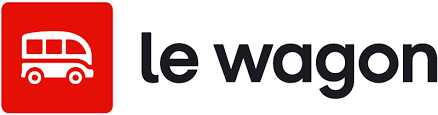

# Instagram likes prediction

In this challenge, we'll be taking Linear Regression further by seeing if we can predict some metrics from social media!

Let's get started!

## Data Exploration

a) Download the [dataset](https://drive.google.com/file/d/1O8ey3uytjqzRUQXTnmXkiqGBoa6lne1C/view?usp=sharing) and upload it to Google Colab. Execute the cell below to load data in a `posts` dataframe. One row of this dataset represents an Instagram post. Pay attention to the compression format of the file!

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("posts.csv")

,id,followers,comments,posts,likes,ts
0,6e56f910,1804,2,851,73,2017-10-08 16:21:28
1,0bea9208,542,1,846,7,2017-07-07 11:58:18
2,88ec6c3f,669,2,1495,33,2018-03-19 17:22:29
3,006b0d03,757,9,144,166,2018-09-02 18:49:52
4,c8a0f2a6,539,4,453,71,2018-04-18 14:15:36
...,...,...,...,...,...,...
2260897,f58b19ab,1847,14,678,166,2018-09-10 15:02:43
2260898,58433abf,237,1,192,31,2018-10-13 10:02:59
2260899,10c4b02c,267,2,110,35,2018-09-18 22:42:03
2260900,0f7064e1,214,3,53,50,2018-11-01 11:32:57


In [ ]:
df_posts=pd.read_csv("posts.csv")

b) Column `id` designates the author. How many **unique** authors do we have ?

In [ ]:
unique_authors = df_posts['id'].nunique()

print(unique_authors)

9298


c) Sort `df_posts` by **ascending date**.

In [ ]:

df_posts_sort = df_posts.sort_values(by='ts', ascending=True)

print(df_posts_sort)


               id  followers  comments  posts  likes                   ts
651352   8fd5eb8f        560         1   1270      8  2015-01-01 00:00:03
1066195  e118b32e        711         0    646     23  2015-01-01 00:00:37
1275101  c2c2c06e       1703         0    811     18  2015-01-01 00:03:10
404586   d15ab509        357         1    794     10  2015-01-01 00:04:01
1180122  9473b9d1        207         0    217      2  2015-01-01 00:04:18
...           ...        ...       ...    ...    ...                  ...
1747502  bd90c5ec        840         1    120    107  2019-03-10 23:53:48
673328   2e246173        582         2     12     27  2019-03-10 23:53:54
1860496  b0817588       1751         0    704     23  2019-03-10 23:54:41
1883069  4bdf6fc3       1250         2    303     42  2019-03-10 23:57:42
1487881  b74fb885        645         0    192      3  2019-03-10 23:58:31

[2260902 rows x 6 columns]


d) This dataset contains several posts for the same author.

By using the pandas function `drop_duplicates()` with parameter `keep=last`, **keep only the last post** made by each author.

This should leave you with a dataframe with as many rows as unique authors!

In [ ]:

df_last_posts = df_posts.drop_duplicates(subset='id', keep='last')

# To Display the dataframe with only the last post of each author

print(df_last_posts)


               id  followers  comments  posts  likes                   ts
2348     e2b204d6        300         0     24     24  2019-03-06 21:34:44
26410    4fc6881c       1979         3     32    196  2018-11-27 14:51:40
60955    a1948a12        559         2     10    123  2019-03-03 13:05:09
61218    855df923        219         4      5     29  2019-03-09 12:52:56
61282    db82b4f7        537         4     10     66  2019-03-08 17:01:38
...           ...        ...       ...    ...    ...                  ...
2260897  f58b19ab       1847        14    678    166  2018-09-10 15:02:43
2260898  58433abf        237         1    192     31  2018-10-13 10:02:59
2260899  10c4b02c        267         2    110     35  2018-09-18 22:42:03
2260900  0f7064e1        214         3     53     50  2018-11-01 11:32:57
2260901  b0fd717e        510         0    417     31  2018-09-29 10:14:18

[9298 rows x 6 columns]


e) Use Plotly to draw a scatter plot between likes and followers. Do you see any **correlation**?


In [ ]:
import plotly.express as px

fig = px.scatter(df_last_posts, x='followers', y='likes', title='Likes vs Followers')
fig.show()


This visual correlation that we see will serve as the intuition for the modelling that we are about to do!

## Modeling

### Preprocessing

a) Isolate the target and the feature!

For our first model, we'll start with the feature being the number of followers. The target, as you already know, is the number of likes!

**Assign X and y appropriately!**

In [ ]:
#Assigning X and Y
# Feature
X = df_last_posts[['followers']]
 # Target
y = df_last_posts['likes']


b) Remember what we said about the importance of separating data into train and test splits?

Split X and y, **80% for training and 20% for testing** into appropriately named variables - X_train, X_test, y_train and y_test.

Don't make your life difficult, use the `train_test_split` function!

In [ ]:
#Scaling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print( X_train.shape)
print( X_test.shape)
print(y_train.shape)
print( y_test.shape)


(7438, 1)
(1860, 1)
(7438,)
(1860,)


c) Now we need to normalize! I know you're excited to apply your new modelling skills, but we first need to make sure the data is scaled!

Scale X_train and X_test - remember to only fit the scaler on X_train and only to transform X_test!

In [ ]:
# Create a scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


### Linear Regression

d) Train a Linear Regression model that predicts likes (our y) based on followers (our X)! Remember to only train it on our **scaled training set**, not on our test set!

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train)


LinearRegression()

### Evaluation

e) What is the R2 score on the train data? What is the MSE (mean squared error)? What about the MAE (mean absolute error)?

Do you think our model is performing well?

<details>
<summary><i>Hint</i></summary>
    ⟿  Use `mean_squared_error` and `mean_absolute_error` of module `sklearn.metrics`.
</details>

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict likes on the scaled training set
y_train_pred = model.predict(X_train_scaled)

# Calculate R2 score
r2_train = r2_score(y_train, y_train_pred)

# Calculate mean squared error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate mean absolute error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Display the metrics
print("R2 score:", r2_train)
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)


R2 score: 0.24005282888301305
Mean Squared Error: 1844.9254489401358
Mean Absolute Error: 33.79285786112726


R2 is close to 0, so the model doesn't look very good.
MSE is quite difficult to interpret, but MAE is much simpler. Our model has an error of 32 likes on average.

f) It's time to evaluate our model on test data!

Use your model to predict likes for test data.

In [ ]:
# Predict likes on the scaled test set
y_test_pred = model.predict(X_test_scaled)
y_test_pred

array([ 53.28505823,  41.44038863, 117.96767785, ...,  57.13579444,
        47.33835168,  48.11824762])

g) What is R2 score value on test data? What is the MSE (mean squared error)?

Do you think our model is a good one?

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score on the test data
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean squared error (MSE) on the test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Display the metrics on the test data
print("R2 score on the test data:", r2_test)
print("Mean Squared Error on the test data:", mse_test)


R2 score on the test data: 0.23677812988081237
Mean Squared Error on the test data: 1655.8774694401682


Results are similar, our model is not really good. It was expected because with such simple model, you cannot get very accurate results.

h) We will try to add one feature to our model.

What does this code do?

In [ ]:
# load data
archive = pd.read_csv('posts.csv.bz', compression='bz2')

# sort values by date
archive = archive.sort_values(by='ts', ascending=True)

# keep only most recent posts
most_recent_posts = archive.drop_duplicates('id', keep='last')

# keep from archive every posts except most recent
posts_wo_most_recent = archive[~archive.index.isin(most_recent_posts.index)]

# compute median of likes on previous posts
median_last_posts = posts_wo_most_recent.groupby('id', as_index=False)[['likes']].median()

# rename column likes by historical_likes
median_last_posts = median_last_posts.rename({'likes': 'historical_likes'}, axis=1)

# merge this colum to initial dataframe
df_posts_new = most_recent_posts.merge(median_last_posts, on="id")

i) Have a look at `df_posts_new` to understand what the previous code did!

In [ ]:
# Display the first few rows of df_posts_new
print(df_posts_new.head())


         id  followers  comments  posts  likes                   ts  \
0  c43f3233       1532         2     76    177  2016-03-26 20:15:50   
1  38cc9619       1395        10    152    192  2016-04-01 14:53:58   
2  58ce1b8d        582         1     80     32  2016-06-23 12:28:21   
3  0dd11d6c       1566         0     57    150  2016-07-24 19:29:49   
4  688eb92e       1675         1    159    166  2016-08-24 21:15:57   

   historical_likes  
0             146.0  
1             187.0  
2              17.5  
3             168.0  
4             149.0  


j) Let's start all over, but now X is **followers and historical likes**.

Split X and y!

In [ ]:
# Assuming df_posts_new is the name of your dataframe
# Features
X = df_posts_new[['followers', 'historical_likes']]
 # Target
y = df_posts_new['likes']


k) Split into train and test split!

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print( X_train.shape)
print (X_test.shape)
print(y_train.shape)
print (y_test.shape)

(7397, 2)
(1850, 2)
(7397,)
(1850,)


l) Scale!

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


m) Time to train a new model!

Train a new linear regression with our new `X_train_scaled`!

In [ ]:
from sklearn.linear_model import LinearRegression

model_new = LinearRegression()

model_new.fit(X_train_scaled, y_train)


LinearRegression()

i) Calculate R2, MSE and MAE on the test data. What do you think of this new model?

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict likes on the scaled test set using the new model
y_test_pred_new = model_new.predict(X_test_scaled)

# Calculate R2 score on the test data
r2_test_new = r2_score(y_test, y_test_pred_new)

# Calculate mean squared error (MSE) on the test data
mse_test_new = mean_squared_error(y_test, y_test_pred_new)

# Calculate mean absolute error (MAE) on the test data
mae_test_new = mean_absolute_error(y_test, y_test_pred_new)

# Display the metrics on the test data
print("New Model R2 score :", r2_test_new)
print("New Model Mean Squared Error :", mse_test_new)
print("New Model Mean Absolute Error :", mae_test_new)


New Model R2 score : 0.5571651369396615
New Model Mean Squared Error : 1006.7056382659536
New Model Mean Absolute Error : 23.405287123961582


This model is better, with an average error of around 23 likes.
R2 is much better than the previous model.